In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_scc = pd.read_csv("datas/scc_fluctuation.csv", encoding="cp949")
df_sct = pd.read_csv("datas/sct_fluctuation.csv", encoding="cp949")

In [3]:
df_scc.head()

,2.82,000210,2019-08-20,2019-08-20.1
0,29.60,264660,2019-08-20,2019-08-20
1,1.50,241790,2019-08-20,2019-08-20
2,0.00,17940,2019-08-21,2019-08-21
3,3.78,143540,2019-08-21,2019-08-21
4,0.37,9440,2019-08-22,2019-08-22


In [4]:
df_sct.head()

,4.03,214450,2019-08-20,2019-08-20.1
0,0.48,222110,2019-08-22,2019-08-22
1,0.81,3850,2019-08-26,2019-08-26
2,9.13,114190,2019-08-28,2019-08-28
3,0.89,10060,2019-09-05,2019-09-05
4,0.89,10060,2019-09-05,2019-09-05


In [5]:
df_scc.columns =["fluctuation", "ticker", "reception_date", "registration_date"]
df_sct.columns =["fluctuation", "ticker", "reception_date", "registration_date"]
df_scc.head()

,fluctuation,ticker,reception_date,registration_date
0,29.60,264660,2019-08-20,2019-08-20
1,1.50,241790,2019-08-20,2019-08-20
2,0.00,17940,2019-08-21,2019-08-21
3,3.78,143540,2019-08-21,2019-08-21
4,0.37,9440,2019-08-22,2019-08-22


In [6]:
df_scc = df_scc.drop(['reception_date', 'registration_date', 'ticker'], axis= 'columns')
df_sct = df_sct.drop(['reception_date', 'registration_date', 'ticker'], axis= 'columns')

In [7]:
df_scc.head()

,fluctuation
0,29.60
1,1.50
2,0.00
3,3.78
4,0.37


In [8]:
df_sct.head()

,fluctuation
0,0.48
1,0.81
2,9.13
3,0.89
4,0.89


In [10]:
df = df_scc.join(df_sct, lsuffix='_scc', rsuffix='_sct')
df

,fluctuation_scc,fluctuation_sct
0,29.60,0.48
1,1.50,0.81
2,0.00,9.13
3,3.78,0.89
4,0.37,0.89
...,...,...
4155,-1.62,NaN
4156,0.00,NaN
4157,-0.68,NaN
4158,-0.49,NaN


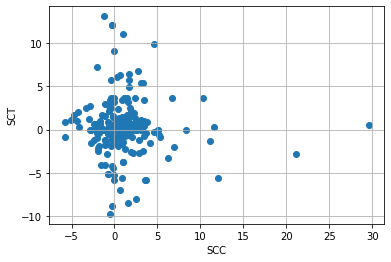

In [12]:
plt.scatter(df.fluctuation_scc, df.fluctuation_sct)
plt.xlabel("SCC")
plt.ylabel("SCT")
plt.grid()
plt.show()

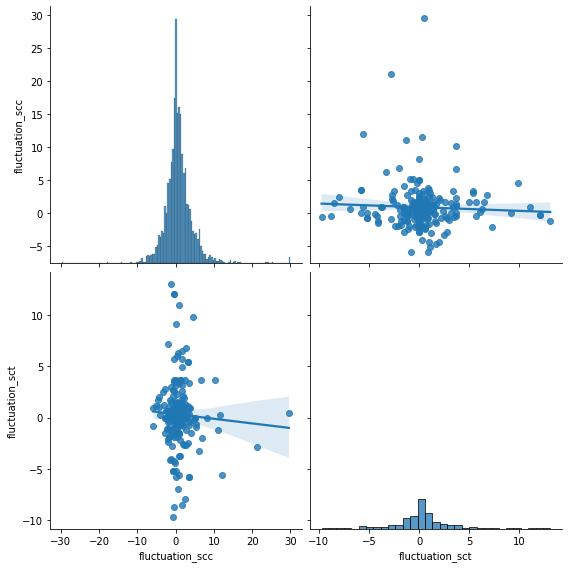

In [16]:
sns.pairplot(df, kind="reg", height=4)

In [18]:
import scipy.stats as stats

In [19]:
rho = stats.spearmanr(df.fluctuation_scc, df.fluctuation_sct)
rho

SpearmanrResult(correlation=nan, pvalue=nan)

x 값을 scc 로 두고 y 값을 sct로 둔 후 
스피어만 상관계수로 문제해결을 하려했으나 실패.